In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pint
ureg = pint.UnitRegistry()

from plotting import plot_unit_sphere

# The goal
I'm a developer of the [TOPAS](http://topasmc.org) Monte Carlo simulation tool for radiotherapy research. To improve our beam source model, I wanted a method to randomly generate uniformly distributed directions that are constrained to a certain region of the unit sphere, centered upon the z-axis (the beam direction). Generated particles are assigned these random directions before they are transported through the simulated geometry, in order to account for beam divergence. In fact, the final goal was a Gaussian distribution of directions, but I knew I needed a uniform distribution to verify that the method worked.

Several different methods of uniformly sampling points on the unit sphere are described in this [Wolfram MathWorld page](http://mathworld.wolfram.com/SpherePointPicking.html).


# Marsaglia transform

Here is a helpful visualization of the Marsaglia transformation, courtesy of this [StackOverflow answer](http://math.stackexchange.com/a/838336). The red circle originally has a radius of 1 and is transformed to the south pole. The purple circle originally has a radius of $\sqrt{0.5} \approx 0.71$ and is transformed to the equator. A uniform distribution on the unit disc is transformed into a uniform distribution on the unit sphere.
![Animation of Marsaglia transformation](http://i.stack.imgur.com/qxPG3.gif)

In [2]:
from marsaglia import UniformBeam

source = UniformBeam(60*ureg.degree, 120*ureg.degree)
x,y,z = source.generate(1000)

print('Efficiency = {:.1%}'.format(source.efficiency()))
print('Predicted efficiency for UniformBeamSource is {:.1%}'.format(np.pi/4))

Efficiency = 78.7%
Predicted efficiency for UniformBeamSource is 78.5%


<IPython.core.display.Javascript object>


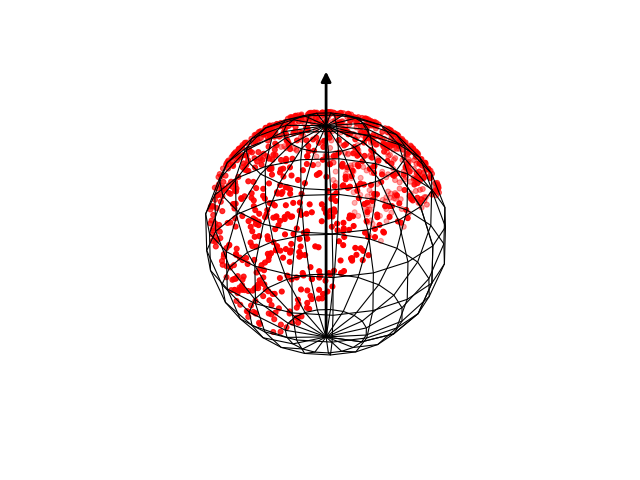

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_unit_sphere(ax)

ax.scatter(x,y,z, c='r', s=20, edgecolors='face')

# A bonus direction generator: Gaussian
It is simple to extend the previous direction generator to sample a Gaussian distribution instead of a uniform distribution.

<IPython.core.display.Javascript object>


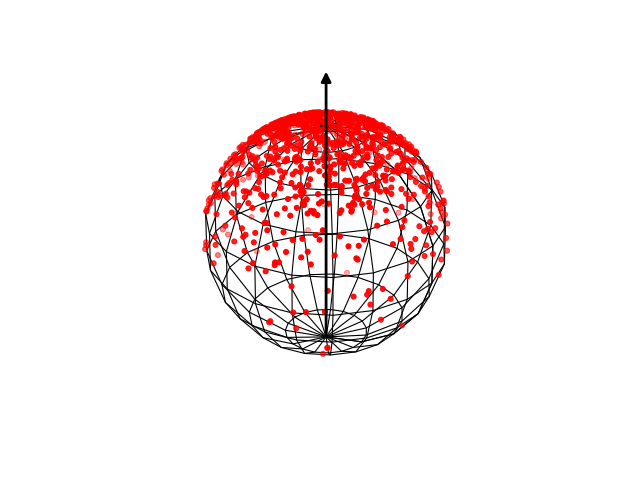

In [4]:
from marsaglia import GaussianBeam

source = GaussianBeam(30*ureg.degree, 30*ureg.degree)
x,y,z = source.generate(1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_unit_sphere(ax)

ax.scatter(x,y,z, c='r', s=20, edgecolors='face')